# Graph RAG: Dynamic Knowledge Graph Construction for Enhanced Retrieval




Graph RAG is a novel approach that constructs a knowledge graph on-the-fly, linking relevant entities during the retrieval process. By leveraging the relationships between nodes in the graph, it determines when and how much external knowledge to retrieve, ensuring that the information accessed is both relevant and contextually appropriate. This method utilizes confidence scores derived from the graph to guide the expansion of retrieved information, effectively avoiding irrelevant additions. As a result, Graph RAG improves both efficiency and response accuracy by maintaining a compact and relevant knowledge graph.



## Key Features of Graph RAG



- **Dynamic Knowledge Graph Construction**: The system builds a knowledge graph in real-time based on the entities identified during the retrieval process, allowing for immediate contextualization of information.

- **Entity Linking**: By linking relevant entities, Graph RAG enhances the depth of retrieval, ensuring that related concepts are considered when generating responses.

- **Contextual Decision-Making**: The framework uses relationships between nodes to inform decisions about which external knowledge to retrieve, enhancing contextual relevance.

- **Confidence Score Utilization**: Confidence scores from the graph guide the retrieval process, helping to prioritize high-quality information while minimizing irrelevant additions.



## How Graph RAG Works


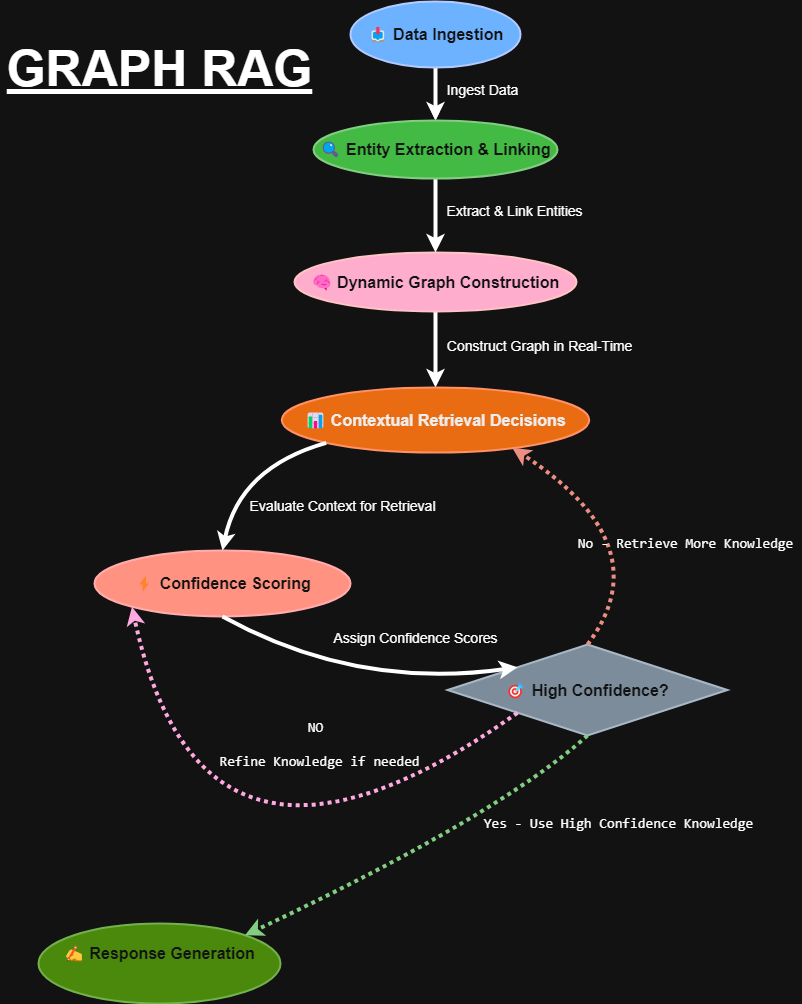


1. **Data Ingestion**:
   - The system begins by ingesting textual data from various sources, identifying key entities within the text that will form nodes in the knowledge graph.

2. **Entity Extraction and Linking**:
   - As entities are extracted, they are linked together based on their relationships, forming a network that represents interconnections among various concepts.

3. **Dynamic Graph Construction**:
   - The knowledge graph is constructed in real-time as queries are processed, allowing for immediate access to relevant information based on current user needs.

4. **Contextual Retrieval Decisions**:
   - When a query is received, Graph RAG evaluates relationships within the graph to determine which external knowledge should be retrieved.
   - Confidence scores assigned to nodes help prioritize high-quality information while avoiding irrelevant data.

5. **Response Generation**:
   - The final response is generated by synthesizing information from both the retrieved external sources and the constructed knowledge graph.
   - This synthesis ensures that responses are coherent and enriched with contextual insights derived from interlinked entities.



In [ ]:
!pip install -q pypdf2 groq

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 232.6/232.6 kB 2.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 108.8/108.8 kB 8.1 MB/s eta 0:00:00


In [ ]:
import os
import requests
from PyPDF2 import PdfReader
from groq import Groq
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.feature_extraction.text import TfidfVectorizer
import networkx as nx  # For creating and managing the knowledge graph
import matplotlib.pyplot as plt  # For visualizing the knowledge graph

In [ ]:
# Step 1: Initialize the Groq client
client = Groq(api_key="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")

In [ ]:
# Step 2: Download and process the PDF document
pdf_url = "https://arxiv.org/pdf/1810.04805.pdf"  # Example: BERT paper
pdf_path = "BERT_paper.pdf"

In [ ]:
response = requests.get(pdf_url)
with open(pdf_path, 'wb') as pdf_file:
    pdf_file.write(response.content)

In [ ]:
reader = PdfReader(pdf_path)
text = ""
for page in reader.pages:
    text += page.extract_text()

In [ ]:
# Step 3: Define the query
query = "What is BERT architecture?"
evaluation_dataset = [
    {"query": query, "expected_output": "Description of BERT architecture."}
]

In [ ]:
# Step 4: Chunk the document for processing
chunks = [text[i:i + 1000] for i in range(0, len(text), 1000)]  # Divide document into manageable chunks

In [ ]:
# Step 5: Create a Knowledge Graph
G = nx.Graph()  # Initialize a new graph

In [ ]:
# Example entity extraction and linking (this should be replaced with a proper NLP entity extraction method)
entities = [
    ("BERT", "A transformer-based model for NLP."),
    ("Transformer", "A model architecture that uses self-attention."),
    ("Masked Language Modeling", "A training objective for BERT.")
]

In [ ]:
# Add nodes and edges to the graph based on extracted entities and relationships
for entity, description in entities:
    G.add_node(entity, description=description)

In [ ]:
# Add relationships (edges) between entities
G.add_edge("BERT", "Transformer", relationship="is a type of")
G.add_edge("BERT", "Masked Language Modeling", relationship="uses")

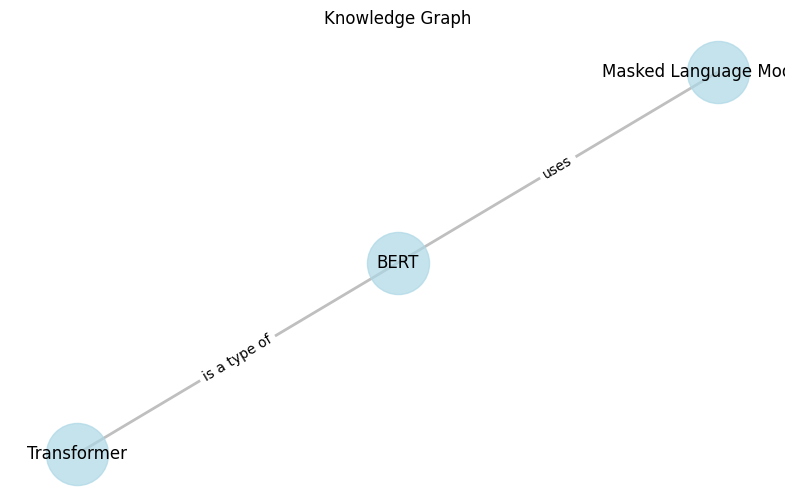

In [ ]:
# Draw the graph
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G)  # positions for all nodes

# Draw nodes and edges
nx.draw_networkx_nodes(G, pos, node_size=2000, node_color='lightblue', alpha=0.7)
nx.draw_networkx_edges(G, pos, width=2, alpha=0.5, edge_color='gray')

# Draw labels
nx.draw_networkx_labels(G, pos, font_size=12, font_family='sans-serif')

# Draw edge labels (relationships)
edge_labels = nx.get_edge_attributes(G, 'relationship')
nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels)

# Set title and show plot
plt.title("Knowledge Graph")
plt.axis('off')  # Turn off the axis
plt.show()

In [ ]:
# Step 6: Retrieve relevant chunks using cosine similarity
vectorizer = TfidfVectorizer()
chunk_embeddings = vectorizer.fit_transform(chunks)
query_embedding = vectorizer.transform([query])

NameError: name 'chunks' is not defined

In [ ]:
similarities = cosine_similarity(query_embedding, chunk_embeddings).flatten()
top_k = 5  # Retrieve the top 5 most relevant chunks
retrieved_chunk_indices = similarities.argsort()[-top_k:][::-1]
retrieved_chunks = [chunks[i] for i in retrieved_chunk_indices]

In [ ]:
print(f"Top retrieved chunks for query '{query}':\n")
for idx, chunk in enumerate(retrieved_chunks, start=1):
    print(f"Chunk {idx}: {chunk[:200]}...\n")  # Display first 200 characters of each chunk

Top retrieved chunks for query 'What is BERT architecture?':

Chunk 1: BERT and its detailed implementa-
tion in this section. There are two steps in our
framework: pre-training and ﬁne-tuning . Dur-
ing pre-training, the model is trained on unlabeled
data over different...

Chunk 2: can beneﬁt from the larger, more
expressive pre-trained representations even when
downstream task data is very small.
5.3 Feature-based Approach with BERT
All of the BERT results presented so far have...

Chunk 3: Additionally, for BERT LARGE we found that ﬁne-
tuning was sometimes unstable on small datasets,
so we ran several random restarts and selected the
best model on the Dev set. With random restarts,
we ...

Chunk 4: BERT: Pre-training of Deep Bidirectional Transformers for
Language Understanding
Jacob Devlin Ming-Wei Chang Kenton Lee Kristina Toutanova
Google AI Language
fjacobdevlin,mingweichang,kentonl,kristout...

Chunk 5: ular
representation learning models including ELMo,
OpenAI GPT and BERT. 

In [ ]:
# Step 7: Generate response using Graph RAG process
module_results = []
for chunk in retrieved_chunks:
    try:
        # Combine query with relevant chunk to form reasoning chains
        combined_input = f"Query: {query}\nRelevant information: {chunk}"

        # Send the combined input to the Groq API for generating the final answer
        response = client.chat.completions.create(
            messages=[
                {"role": "system", "content": "You are a highly knowledgeable assistant trained in NLP."},
                {"role": "user", "content": combined_input},
            ],
            model="llama3-8b-8192",  # Model selection
        )

        answer = response.choices[0].message.content
        module_results.append({"chunk": chunk[:200], "answer": answer})  # Store chunk and answer

    except Exception as e:
        print(f"Error generating answer: {e}")

In [ ]:
# Step 8: Find the best result from module results based on length or relevance
best_result = max(module_results, key=lambda x: len(x["answer"]))  # Select result with the longest answer

In [ ]:
# Output final result along with relevant context from the knowledge graph
print("\nBest result based on module evaluation:")
print(f"Chunk: {best_result['chunk']}\nAnswer: {best_result['answer']}")


Best result based on module evaluation:
Chunk: Additionally, for BERT LARGE we found that ﬁne-
tuning was sometimes unstable on small datasets,
so we ran several random restarts and selected the
best model on the Dev set. With random restarts,
we 
Answer: BERT (Bidirectional Encoder Representations from Transformers) is a pre-trained language model developed by Google researchers in 2018. The BERT architecture is a multi-layer bidirectional transformer encoder that is trained on a large corpus of text data, such as the entire Wikipedia and BookCorpus, and is designed to capture contextual relationships between words.

The key components of the BERT architecture are:

1. WordPiece tokenization: BERT uses WordPiece tokenization, which is a type of word segmentation that divides words into subwords (smaller units of words).
2. Pre-training: BERT is pre-trained on a large corpus of text data using two main objectives: Masked Language Modeling (MLM) and Next Sentence Prediction (NSP).
	* M

In [ ]:
# Display knowledge graph information (nodes and relationships)
print("\nKnowledge Graph Information:")
for node in G.nodes(data=True):
    print(f"Node: {node[0]}, Description: {node[1]['description']}")


Knowledge Graph Information:
Node: BERT, Description: A transformer-based model for NLP.
Node: Transformer, Description: A model architecture that uses self-attention.
Node: Masked Language Modeling, Description: A training objective for BERT.


In [ ]:
for edge in G.edges(data=True):
    print(f"Edge from {edge[0]} to {edge[1]} with relationship '{edge[2]['relationship']}'")

Edge from BERT to Transformer with relationship 'is a type of'
Edge from BERT to Masked Language Modeling with relationship 'uses'


In [ ]:
# Visualize the Knowledge Graph
plt.figure(figsize=(10, 6))
pos = nx.spring_layout(G)  # positions for all nodes

<Figure size 1000x600 with 0 Axes>

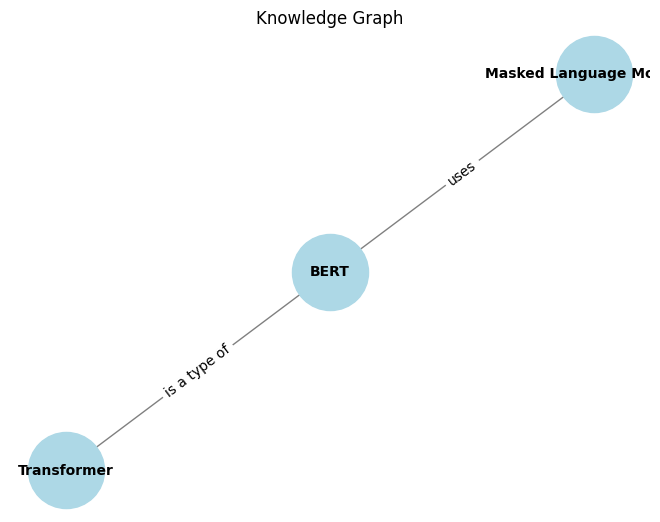

In [ ]:
# Draw nodes and edges with labels
nx.draw(G, pos, with_labels=True, node_size=3000, node_color='lightblue', font_size=10, font_weight='bold', edge_color='gray')
labels = nx.get_edge_attributes(G, 'relationship')
nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
plt.title("Knowledge Graph")
plt.show()

## Explanation of Code Workflow

## Initialize the Groq Client:
The code initializes a Groq client with an API key to enable interaction with the Groq API for generating responses.

## Download and Process the PDF Document:
The BERT paper is downloaded from a specified URL and saved locally. The PDF is then read using PyPDF2 to extract text content from all pages.

## Define the Query:
A query titled "What is BERT architecture?" is defined to focus on extracting relevant information about BERT's architecture.

## Chunking the Document for Processing:
The extracted text is divided into smaller chunks of 1000 characters each to facilitate easier processing and retrieval.

## Create a Knowledge Graph:
A knowledge graph is constructed using NetworkX. Entities related to BERT are added as nodes, and relationships between these entities are represented as edges.

## Retrieve Relevant Chunks Using Cosine Similarity:
The TF-IDF vectorizer converts both the document chunks and the query into numerical representations (embeddings). Cosine similarity is calculated to identify the top five most relevant chunks based on their similarity scores.

## Generate Response Using Graph RAG Process:
Each retrieved chunk is combined with the original query to create a comprehensive input, which is sent to the Groq API for generating a final answer. The responses are stored for evaluation.

## Find the Best Result:
The system evaluates all generated answers and selects the one with the longest length, assuming that it provides more detailed information. The best result is printed alongside its corresponding text chunk.

## Knowledge Graph Information:
The code prints information about nodes and edges in the knowledge graph, providing insight into how entities are interconnected.

## Visualize Knowledge Graph:
Finally, it visualizes the knowledge graph using Matplotlib, showing nodes (entities) and edges (relationships) clearly.


## Applications of Graph RAG



- **Open-Domain Question Answering**: Particularly effective for complex queries requiring an understanding of relationships between various entities across diverse domains.

- **Knowledge Management Systems**: Enhances systems that need to provide users with accurate and contextually relevant information by mapping out complex networks of related concepts.

- **Content Creation Tools**: Assists writers in generating contextually rich narratives by providing insights into how different ideas and entities are interconnected.

- **Research Assistance**: Supports researchers by visualizing relationships between concepts and facilitating deeper exploration of topics through interconnected data points.



## Advantages of Graph RAG



- **Improved Retrieval Depth**: The ability to dynamically construct a knowledge graph allows for deeper exploration of topics and relationships within the data.

- **Enhanced Response Accuracy**: By focusing on relevant entities and their connections, Graph RAG increases the likelihood of generating accurate and contextually appropriate responses.

- **Efficiency in Information Access**: The compact nature of the knowledge graph reduces redundancy and ensures that only necessary information is retrieved, improving processing speed.

- **Scalability**: The framework can easily adapt to new data sources and evolving knowledge bases without requiring extensive reconfiguration.



## Limitations of Graph RAG



- **Complexity in Implementation**: Building a dynamic knowledge graph requires sophisticated algorithms and careful management of entity relationships, which can complicate system design.

- **Dependence on Quality Data**: The effectiveness of Graph RAG relies heavily on the quality of the underlying data; poor-quality or incomplete data can lead to inaccuracies in the constructed graph.

- **Resource Intensive**: Constructing and maintaining a dynamic knowledge graph may require significant computational resources, especially for large datasets.



## Conclusion




Graph RAG represents a significant advancement in retrieval-augmented generation methodologies by integrating dynamic knowledge graph construction into its framework. By linking relevant entities during retrieval and utilizing node relationships for contextual decision-making, it enhances both efficiency and accuracy in information retrieval. As AI continues to evolve, frameworks like Graph RAG will play an essential role in improving how language models access and utilize vast amounts of interconnected data.
